Waste Management Using CNN Model


In [3]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [6]:
pip install numpy pandas matplotlib tqdm


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
train_path="DATASET/TRAIN"
test_path="DATASET/TEST"

In [8]:
#Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing. image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob


In [9]:
#Visualization
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})


100%|██████████| 9999/9999 [01:40<00:00, 99.98it/s] 


In [10]:
data.shape

(22564, 2)

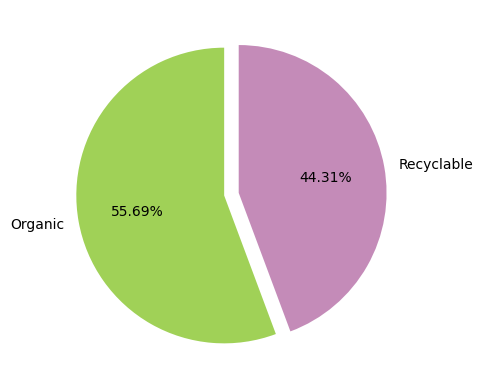

In [11]:
colors = ["#a0d157", "#c48bb8"]
plt.pie(data.label.value_counts(), labels = ["Organic","Recyclable"], autopct = '%0.2f%%', colors = colors, startangle = 90, explode = [0.05, 0.05] ) #explode is optional
plt.show()

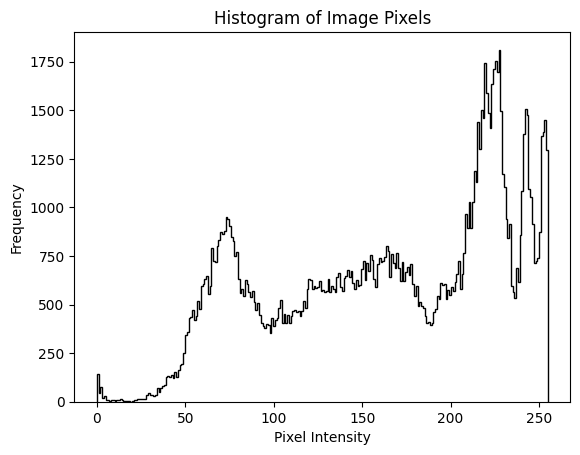

In [12]:
def plot_image_histogram(image_path):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.hist(img.ravel(), bins=256, histtype='step', color='black')
    plt.title("Histogram of Image Pixels")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Example
image_path = "path_to_image.jpg"
plot_image_histogram(image_path)


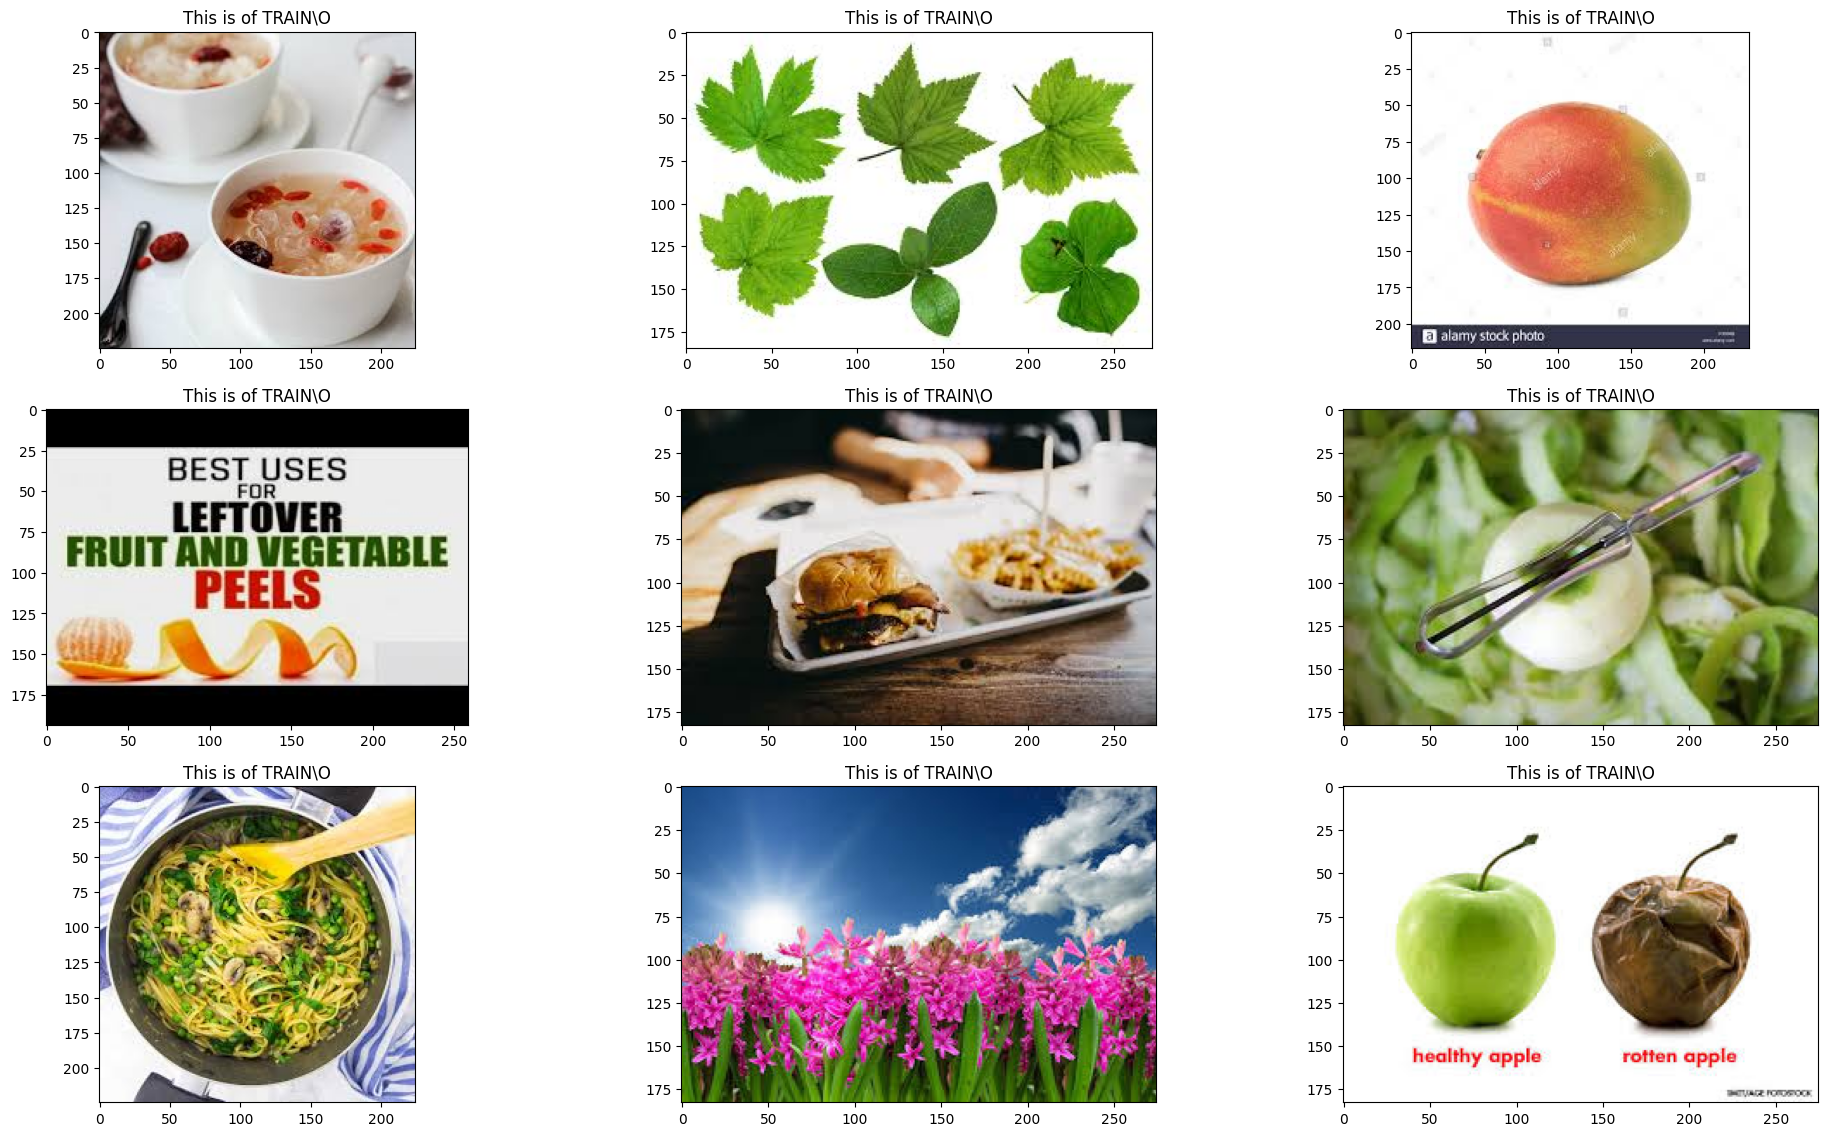

In [13]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

CNN-Convolutional Neural Network

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",optimizer="adam",metrics=["accuracy"])
batch_size= 256

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [17]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [18]:
batch_size=16

In [19]:
train_generator = train_datagen.flow_from_directory(train_path,target_size= (224,224), batch_size= batch_size,color_mode= "rgb",class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(train_path,target_size= (224,224), batch_size= batch_size,color_mode= "rgb",class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 22564 images belonging to 2 classes.


In [20]:
hist = model.fit(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 781s 551ms/step - accuracy: 0.7720 - loss: 0.5162 - val_accuracy: 0.7984 - val_loss: 0.4227
Epoch 2/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 743s 527ms/step - accuracy: 0.8305 - loss: 0.4112 - val_accuracy: 0.8657 - val_loss: 0.3308
Epoch 3/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 728s 516ms/step - accuracy: 0.8529 - loss: 0.3751 - val_accuracy: 0.8685 - val_loss: 0.3200
Epoch 4/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 1174s 832ms/step - accuracy: 0.8645 - loss: 0.3459 - val_accuracy: 0.8751 - val_loss: 0.2991
Epoch 5/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 1085s 769ms/step - accuracy: 0.8734 - loss: 0.3229 - val_accuracy: 0.8888 - val_loss: 0.2767
Epoch 6/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 2177s 2s/step - accuracy: 0.8886 - loss: 0.2903 - val_accuracy: 0.9091 - val_loss: 0.2304
Epoch 7/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 3881s 3s/step - accuracy: 0.9026 - loss: 0.2532 - val_accuracy: 0.9258 - val_loss: 0.1978
Epoch 8/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 1327s 940ms/step - acc